In [137]:
import numpy as np
import matplotlib.pyplot as plt

c = 3e8 # Speed of light in m/s

# Given values
displacement_step = 1e-10  # Displacement step for FTXRS
optical_path_length_change = 0.699 * displacement_step  # # Corresponding change in optical path length for FTXRS per displacement step
factor = optical_path_length_change / displacement_step # Factor to convert displacement step to optical path length change

N_wavelengths = 10 # Number of wavelengths to consider
N_tau = 100000 # Number of time delays to consider

wavelengths = np.linspace(0.1e-9, 10e-9, N_wavelengths) # Wavelengths to consider
frequencies = c / wavelengths # Corresponding frequencies to consider
angular_frequencies = 2 * np.pi * frequencies # Corresponding angular frequencies to consider


displacement_steps = np.arange(N_tau) * displacement_step # Set of displacement steps to consider
optical_path_length_diffs = np.arange(N_tau) * optical_path_length_change # Corresponding optical path length differences for each displacement step
tau_vals = np.arange(N_tau) * (optical_path_length_change / c) # Corresponding time delays for each optical path length difference

f_nyquist = 2 * max(frequencies) # Sampling rate
T_nyquist = 1 / f_nyquist # Sampling period
ideal_displacement_step = c / (2 * f_nyquist) # Ideal displacement step

# Print statements for debugging and understanding
print("The ideal displacement step is ", ideal_displacement_step)
print("The actual displacement step is ", optical_path_length_change)
print("The actual tau step is ", tau_vals[1] - tau_vals[0])
print("The actual tau step is ", tau_vals[1])

The ideal displacement step is  2.5e-11
The actual displacement step is  6.99e-11
The actual tau step is  2.33e-19
The actual tau step is  2.33e-19


In [138]:
def phi_statistical_error():
    vibration = np.random.normal(loc=0, scale=1e-11) # Random path difference
    vibration_tau = vibration / c
    return vibration_tau

def phi_systematic_error(tau):
    current_optical_path_length_diff = tau * c
    N_displacements = current_optical_path_length_diff / optical_path_length_change
    offset = N_displacements * 1e-11
    distorted_tau = offset / c
    return distorted_tau

def I(tau):
    I = 0
    for w in angular_frequencies:
        E = 1 + np.exp(1j * w * (tau + phi_statistical_error() + phi_systematic_error(tau))) # Electric field with mirror uncertainty
        I += np.abs(1 + E)**2 # Intensity
    return I

I_vals = np.zeros(len(tau_vals)) # Array to store the intensity values
i=0
for tau in tau_vals:
    I_vals[i] = I(tau) # Calculate the intensity for each time delay
    i+=1

In [103]:
def I(tau):
    I = 0
    for w in angular_frequencies:
        E = 1 + np.exp(1j * w * tau) # Electric field
        I += np.abs(1 + E)**2 # Intensity
    return I

I_vals = np.zeros(len(tau_vals)) # Array to store the intensity values
i=0
for tau in tau_vals:
    I_vals[i] = I(tau) # Calculate the intensity for each time delay
    i+=1

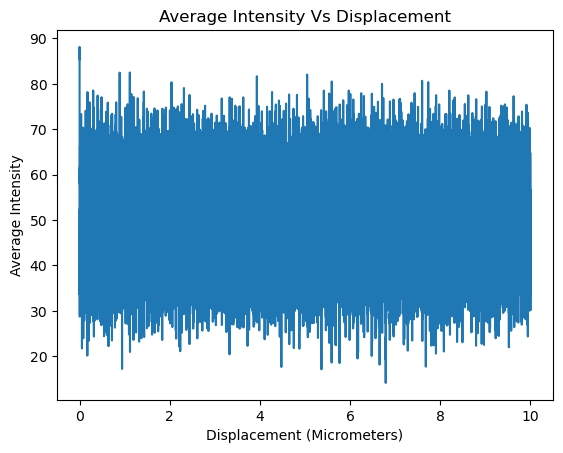

In [139]:
plt.plot(displacement_steps * 1e6, I_vals) # Plot the intensity values against the displacement steps
plt.title("Average Intensity Vs Displacement")
plt.xlabel("Displacement (Micrometers)")
plt.ylabel("Average Intensity")
plt.show()

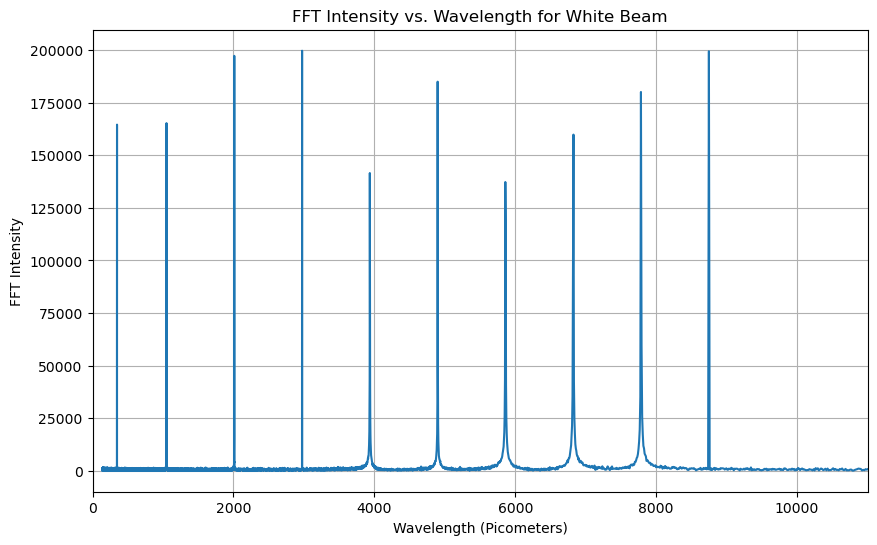

In [140]:
fft_intensity = np.fft.fft(I_vals) # Perform the FFT on the intensity values
fft_freqs = np.fft.fftfreq(len(fft_intensity), tau_vals[1] - tau_vals[0]) # Get the corresponding frequencies for the FFT
positive_freqs = fft_freqs[fft_freqs > 0] # Get the positive frequencies
positive_fft_intensity = np.abs(fft_intensity[fft_freqs > 0]) # Get the FFT intensity values for the positive frequencies

# Convert frequencies to wavelengths and plot
fft_wavelengths = c / positive_freqs # Convert FFT frequencies to wavelengths
plt.figure(figsize=(10, 6))
plt.plot(fft_wavelengths * 1e12, positive_fft_intensity)  # Convert wavelengths to nm and plot
plt.title('FFT Intensity vs. Wavelength for White Beam')
plt.xlabel('Wavelength (Picometers)')
plt.ylabel('FFT Intensity')
#plt.xlim([300, 900])
plt.xlim([0, 11000])
plt.grid()
plt.savefig('fft_intensity_vs_wavelength.png', dpi=300)  # Save the figure
plt.show()